In [12]:
import pandas as pd
import sklearn
import scipy
import numpy as np

## Download the data file

In [32]:
data = pd.read_csv("diabetes_data.csv")

In [35]:
# Change all categorial into binary values
data = data.replace(["Yes", "No", "Male", "Female", "Positive", "Negative"], [1, 0, 1, 0, 1, 0])

In [36]:
data.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Selection methods

In [37]:
# First try Pearson's correlation
correlation = data.corr(method="pearson")

In [38]:
for col in data:
    print(correlation[col].sort_values(ascending=False))
    print("\n")

Age                   1.000000
visual blurring       0.402729
Alopecia              0.321691
Polyphagia            0.315577
muscle stiffness      0.307703
Itching               0.296559
delayed healing       0.257501
partial paresis       0.232742
weakness              0.224596
Irritability          0.201625
Polyuria              0.199781
Obesity               0.140458
Polydipsia            0.137382
class                 0.108679
Genital thrush        0.096519
sudden weight loss    0.064808
Gender                0.062872
Name: Age, dtype: float64


Gender                1.000000
Alopecia              0.327871
Genital thrush        0.208961
Age                   0.062872
Obesity              -0.005396
Irritability         -0.013735
Itching              -0.052496
muscle stiffness     -0.090542
delayed healing      -0.101978
weakness             -0.124490
visual blurring      -0.208092
Polyphagia           -0.219968
Polyuria             -0.268894
sudden weight loss   -0.281840
Polydipsia 

## Use KNN

In [54]:
#split the data into test set(20%) and training set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
#make a copy of training set just incase we accidentally mutate data
train_set_copy = train_set.copy()
test_set_copy = test_set.copy()

In [66]:
from sklearn.neighbors import KNeighborsClassifier
#default of number of neighbors
num_neighbors = 5
neigh = KNeighborsClassifier(n_neighbors = num_neighbors)
neigh.fit(train_set_copy.iloc[:,:16].values, train_set_copy.iloc[:, -1].values)

KNeighborsClassifier()

## Use Analysis of n-fold, cross validation, and confusion matrix

In [67]:
#Test accuracy
from sklearn.metrics import accuracy_score
#observe accuracy for sciklearn KNN
predictions = neigh.predict(test_set_copy.iloc[:, :16].values)
actual = test_set_copy.iloc[:, -1]
sk_acc = accuracy_score(predictions, actual)
print("SKLearn accuracy score: ", sk_acc)

SKLearn accuracy score:  0.8557692307692307


In [68]:
# function to plot KNN algorithm that uses Scikit-learn. 
import matplotlib.pyplot as plt
def plot_sklearn_knn ():
    k_values = []
    error_rate = []
    for i in range(1, 30):
        k_values.append(i)
        neigh = KNeighborsClassifier(n_neighbors = i)
        neigh.fit(train_set_copy.iloc[:,:16].values, train_set_copy.iloc[:, -1].values)
        predictions = neigh.predict(test_set_copy.iloc[:, :-1].values)
        actual = test_set_copy.iloc[:, -1]
        error = 1 - accuracy_score(predictions, actual)
        error_rate.append(error)
    plt.xlabel("k-values")
    plt.ylabel("Error Rate")
    plt.title("Using Sklearn KNN")
    plt.plot(k_values, error_rate)
    plt.show()
        

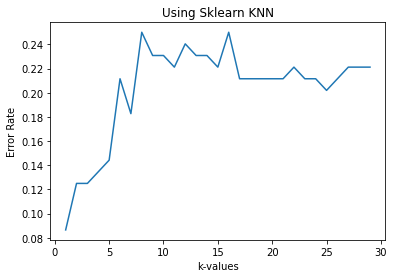

In [69]:
plot_sklearn_knn()

In [74]:
#set number of neighbors to 11, optimal value we saw from analysis. 
num_neighbors = 5
neigh = KNeighborsClassifier(n_neighbors = num_neighbors)
X_values = train_set_copy.iloc[:,:16].values
Y_values = train_set_copy.iloc[:, -1].values
neigh.fit(X_values, Y_values)
predictions = neigh.predict(test_set_copy.iloc[:, :16].values)
actual = test_set_copy.iloc[:, -1]
final_acc = accuracy_score(predictions, actual)
print("SKLearn KNN at k = 11 accuracy score: ", final_acc)

SKLearn KNN at k = 11 accuracy score:  0.8557692307692307


In [75]:
#nfold cross validation for sklearn model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(neigh, X_values, Y_values, cv = 5)
print(f"Scores: {scores}")
print(f"Mean: {scores.mean()}")
print(f"Standard Deviation: {scores.std()}")

Scores: [0.80952381 0.86746988 0.81927711 0.87951807 0.87951807]
Mean: 0.851061388410786
Standard Deviation: 0.03041188980835058


In [76]:
#Confusion matrix for sklearn model
from sklearn.metrics import confusion_matrix, classification_report
def confusion_matrix_sklearn ():
    neigh_confusion_matrix = confusion_matrix(actual, predictions)
    classification = classification_report(actual, predictions)
    print(neigh_confusion_matrix)
    print(classification)
confusion_matrix_sklearn()

[[30  3]
 [12 59]]
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        33
           1       0.95      0.83      0.89        71

    accuracy                           0.86       104
   macro avg       0.83      0.87      0.84       104
weighted avg       0.88      0.86      0.86       104

